#DATA COLLECTION

In [3]:
import pandas as pd

df1 = pd.read_csv('/content/Crop and fertilizer dataset.csv')
df2 = pd.read_csv('/content/original.csv')


df1 = df1[['Temperature', 'Soil_color', 'Nitrogen', 'Phosphorus', 'Potassium', 'Crop', 'Fertilizer']]
df2 = df2[['Temparature', 'Soil_Type', 'Nitrogen', 'Phosphorous', 'Potassium', 'Crop_Type', 'Fertilizer']]

df2 = df2.rename(columns={
    'Soil_Type': 'Soil',
    'Crop_Type': 'Crop',
    'Temparature': 'Temperature',
    'Phosphorous': 'Phosphorus'
})

df1 = df1.rename(columns={
    'Soil_color': 'Soil',
})

In [4]:
df1.head()

,Temperature,Soil,Nitrogen,Phosphorus,Potassium,Crop,Fertilizer
0,20,Black,75,50,100,Sugarcane,Urea
1,20,Black,80,50,100,Sugarcane,Urea
2,20,Black,85,50,100,Sugarcane,Urea
3,20,Black,90,50,100,Sugarcane,Urea
4,20,Black,95,50,100,Sugarcane,Urea


In [5]:
df2.head()

,Temperature,Soil,Nitrogen,Phosphorus,Potassium,Crop,Fertilizer
0,20,Clayey,90,36,49,rice,Urea
1,25,Loamy,66,36,59,rice,Urea
2,33,Loamy,41,0,0,Wheat,Urea
3,34,Loamy,38,0,0,Wheat,Urea
4,38,Loamy,39,0,0,Wheat,Urea


In [6]:
common_rows = pd.merge(df1, df2, how='inner')

print(common_rows)

Empty DataFrame
Columns: [Temperature, Soil, Nitrogen, Phosphorus, Potassium, Crop, Fertilizer]
Index: []


In [7]:
merged_df = pd.merge(df1, df2, how='outer')
df1.shape , df2.shape , merged_df.shape

((4513, 7), (552, 7), (5065, 7))

In [8]:
merged_df.to_csv('Final_dataset.csv', index=False, header=True)

In [9]:
print(df1[df1['Crop'] == 'kidneybeans'])

Empty DataFrame
Columns: [Temperature, Soil, Nitrogen, Phosphorus, Potassium, Crop, Fertilizer]
Index: []


In [10]:
print(df2[df2['Crop'] == 'kidneybeans'].shape[0])

20


In [11]:
print(merged_df[merged_df['Crop'] == 'kidneybeans'].shape[0])

20


In [12]:
# Count the rows where 'Crop' == 'kidneybeans' in df2 and merged_df
df2_kb_count = df2[df2['Crop'] == 'kidneybeans'].shape[0]
merged_df_kb_count = merged_df[merged_df['Crop'] == 'kidneybeans'].shape[0]

# Check if there is any commonality
if df2_kb_count > 0 and merged_df_kb_count > 0:
    print("There are common rows with 'kidneybeans' in both DataFrames.")
else:
    print("No common rows with 'kidneybeans' in both DataFrames.")


There are common rows with 'kidneybeans' in both DataFrames.


In [13]:
if df2_kb_count == merged_df_kb_count:
  print(df2_kb_count)
else:
  print(lol)

20


In [14]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5065 entries, 0 to 5064
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Temperature  5065 non-null   int64 
 1   Soil         5065 non-null   object
 2   Nitrogen     5065 non-null   int64 
 3   Phosphorus   5065 non-null   int64 
 4   Potassium    5065 non-null   int64 
 5   Crop         5065 non-null   object
 6   Fertilizer   5065 non-null   object
dtypes: int64(4), object(3)
memory usage: 277.1+ KB


#Model Generation

##Understanding the dataset

In [15]:
import pandas as pd

file_path = "/content/Final_dataset.csv"
data = pd.read_csv(file_path)

# Step 1.1: Display basic information about the dataset
print("Dataset Info:")
print(data.info())

# Step 1.2: Display the first few rows of the dataset
print("\nFirst 5 Rows of the Dataset:")
print(data.head())

# Step 1.3: Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Step 1.4: Summary statistics of numerical columns
print("\nSummary Statistics:")
print(data.describe())

# Step 1.5: Check for duplicate rows
duplicates = data.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicates}")

# Step 1.6: Check unique values in important categorical columns
categorical_columns = ['Soil', 'Crop']  # Update if more columns are relevant
for col in categorical_columns:
    print(f"\nUnique values in '{col}':")
    print(data[col].unique())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5065 entries, 0 to 5064
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Temperature  5065 non-null   int64 
 1   Soil         5065 non-null   object
 2   Nitrogen     5065 non-null   int64 
 3   Phosphorus   5065 non-null   int64 
 4   Potassium    5065 non-null   int64 
 5   Crop         5065 non-null   object
 6   Fertilizer   5065 non-null   object
dtypes: int64(4), object(3)
memory usage: 277.1+ KB
None

First 5 Rows of the Dataset:
   Temperature   Soil  Nitrogen  Phosphorus  Potassium         Crop  \
0            0  Loamy        23           6         23  kidneybeans   
1            0  Loamy        23           6         23  kidneybeans   
2            0  Loamy        23           6         23  kidneybeans   
3            0  Loamy        23           6         23  kidneybeans   
4           10  Black       100          60         60       Cotton  

In [16]:
# Remove duplicate rows
data_cleaned = data.drop_duplicates()
print(f"Dataset after removing duplicates: {data_cleaned.shape}")

# Standardize `Soil` column
data_cleaned['Soil'] = data_cleaned['Soil'].str.strip().str.title()
print("\nUnique Soil Types after cleanup:")
print(data_cleaned['Soil'].unique())

# Standardize `Crop` column
data_cleaned['Crop'] = data_cleaned['Crop'].str.strip().str.lower()
print("\nUnique Crop Names after cleanup:")
print(data_cleaned['Crop'].unique())

Dataset after removing duplicates: (4576, 7)

Unique Soil Types after cleanup:
['Loamy' 'Black' 'Sandy' 'Dark Brown' 'Red' 'Reddish Brown' 'Clayey'
 'Medium Brown' 'Light Brown']

Unique Crop Names after cleanup:
['kidneybeans' 'cotton' 'orange' 'gram' 'wheat' 'turmeric' 'groundnut'
 'soybean' 'ginger' 'sugarcane' 'maize' 'rice' 'tur' 'urad' 'masoor'
 'jowar' 'grapes' 'coffee' 'moong' 'pulses' 'pomegranate' 'watermelon'
 'ground nuts' 'barley' 'oil seeds' 'millets' 'paddy' 'tobacco']


<ipython-input-16-a253d8e0c7ec>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Soil'] = data_cleaned['Soil'].str.strip().str.title()
<ipython-input-16-a253d8e0c7ec>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Crop'] = data_cleaned['Crop'].str.strip().str.lower()


In [17]:
# Replace 'ground nut' with 'groundnut' in the Crop column
data_cleaned['Crop'] = data_cleaned['Crop'].str.replace('ground nut', 'groundnut', case=False)
data_cleaned['Crop'] = data_cleaned['Crop'].str.replace('groundnuts', 'groundnut', case=False)
data_cleaned['Crop'] = data_cleaned['Crop'].str.replace('paddy', 'rice', case=False)

print("\nUnique Crop Names after replacing 'ground nut':")
print(data_cleaned['Crop'].unique())


Unique Crop Names after replacing 'ground nut':
['kidneybeans' 'cotton' 'orange' 'gram' 'wheat' 'turmeric' 'groundnut'
 'soybean' 'ginger' 'sugarcane' 'maize' 'rice' 'tur' 'urad' 'masoor'
 'jowar' 'grapes' 'coffee' 'moong' 'pulses' 'pomegranate' 'watermelon'
 'barley' 'oil seeds' 'millets' 'tobacco']


<ipython-input-17-1babb4674887>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Crop'] = data_cleaned['Crop'].str.replace('ground nut', 'groundnut', case=False)
<ipython-input-17-1babb4674887>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Crop'] = data_cleaned['Crop'].str.replace('groundnuts', 'groundnut', case=False)
<ipython-input-17-1babb4674887>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [18]:
# Distribution of soil types
print("\nSoil Type Distribution:")
print(data_cleaned['Soil'].value_counts())

# Distribution of crop types
print("\nCrop Type Distribution:")
print(data_cleaned['Crop'].value_counts())


Soil Type Distribution:
Soil
Black            2224
Red              1243
Dark Brown        639
Reddish Brown     265
Light Brown        54
Medium Brown       51
Loamy              48
Sandy              27
Clayey             25
Name: count, dtype: int64

Crop Type Distribution:
Crop
sugarcane      988
wheat          848
cotton         666
jowar          383
maize          353
rice           325
groundnut      178
tur            126
grapes         125
ginger         125
moong           99
urad            99
gram            78
turmeric        55
soybean         45
masoor          12
millets         11
pulses          10
pomegranate      8
barley           7
oil seeds        7
tobacco          7
orange           7
watermelon       5
kidneybeans      5
coffee           4
Name: count, dtype: int64


In [19]:
cleaned_file_path = "Cleaned_Fertilizer_Dataset.csv"
data_cleaned.to_csv(cleaned_file_path, index=False)
print(f"\nCleaned dataset saved to: {cleaned_file_path}")

data_cleaned.shape


Cleaned dataset saved to: Cleaned_Fertilizer_Dataset.csv


(4576, 7)

##Crop specific Recommendation

###Crop Nutrients Table

In [23]:
crop_requirements = {
    'rice': {'Nitrogen': (80, 120), 'Phosphorus': (40, 60), 'Potassium': (60, 80)},
    'wheat': {'Nitrogen': (50, 90), 'Phosphorus': (40, 60), 'Potassium': (40, 60)},
    'sugarcane': {'Nitrogen': (100, 150), 'Phosphorus': (50, 70), 'Potassium': (70, 100)},
    'groundnut': {'Nitrogen': (20, 50), 'Phosphorus': (40, 60), 'Potassium': (40, 50)},
    'cotton': {'Nitrogen': (60, 100), 'Phosphorus': (40, 60), 'Potassium': (50, 70)},
    'maize': {'Nitrogen': (50, 80), 'Phosphorus': (40, 60), 'Potassium': (40, 60)},
    'tur': {'Nitrogen': (40, 70), 'Phosphorus': (40, 60), 'Potassium': (40, 60)},
    'ginger': {'Nitrogen': (70, 120), 'Phosphorus': (40, 60), 'Potassium': (60, 80)},
    'grapes': {'Nitrogen': (60, 90), 'Phosphorus': (40, 50), 'Potassium': (70, 90)},
    'moong': {'Nitrogen': (30, 50), 'Phosphorus': (40, 60), 'Potassium': (40, 50)},
    'urad': {'Nitrogen': (30, 50), 'Phosphorus': (40, 60), 'Potassium': (40, 50)},
    'gram': {'Nitrogen': (20, 40), 'Phosphorus': (30, 50), 'Potassium': (30, 50)},
    'turmeric': {'Nitrogen': (50, 90), 'Phosphorus': (40, 60), 'Potassium': (40, 60)},
    'soybean': {'Nitrogen': (40, 70), 'Phosphorus': (40, 60), 'Potassium': (40, 60)},
    'masoor': {'Nitrogen': (20, 40), 'Phosphorus': (30, 50), 'Potassium': (30, 50)},
    'millets': {'Nitrogen': (30, 60), 'Phosphorus': (30, 50), 'Potassium': (30, 50)},
    'pulses': {'Nitrogen': (20, 50), 'Phosphorus': (30, 50), 'Potassium': (30, 50)},
    'pomegranate': {'Nitrogen': (40, 80), 'Phosphorus': (30, 50), 'Potassium': (50, 80)},
    'barley': {'Nitrogen': (50, 90), 'Phosphorus': (40, 60), 'Potassium': (40, 60)},
    'oil seeds': {'Nitrogen': (40, 60), 'Phosphorus': (40, 60), 'Potassium': (40, 60)},
    'tobacco': {'Nitrogen': (60, 100), 'Phosphorus': (40, 60), 'Potassium': (50, 70)},
    'orange': {'Nitrogen': (60, 90), 'Phosphorus': (30, 50), 'Potassium': (50, 80)},
    'watermelon': {'Nitrogen': (50, 80), 'Phosphorus': (30, 50), 'Potassium': (50, 80)},
    'kidneybeans': {'Nitrogen': (40, 70), 'Phosphorus': (40, 60), 'Potassium': (40, 60)},
    'coffee': {'Nitrogen': (70, 120), 'Phosphorus': (40, 60), 'Potassium': (50, 80)},
}

In [21]:
def crop_specific_recommendation(row):
    crop = row['Crop'].lower()
    recommendations = []

    # Check if the crop is in the requirements table
    if crop in crop_requirements:
        ideal = crop_requirements[crop]

        # Check Nitrogen
        if row['Nitrogen'] < ideal['Nitrogen'][0]:
            recommendations.append(f"Nitrogen is low for {crop}. Apply urea or composted manure.")
        elif row['Nitrogen'] > ideal['Nitrogen'][1]:
            recommendations.append(f"Nitrogen is high for {crop}. Reduce nitrogen-based fertilizers.")

        # Check Phosphorus
        if row['Phosphorus'] < ideal['Phosphorus'][0]:
            recommendations.append(f"Phosphorus is low for {crop}. Use superphosphate or bone meal.")
        elif row['Phosphorus'] > ideal['Phosphorus'][1]:
            recommendations.append(f"Phosphorus is high for {crop}. Avoid phosphorus-based fertilizers.")

        # Check Potassium
        if row['Potassium'] < ideal['Potassium'][0]:
            recommendations.append(f"Potassium is low for {crop}. Apply muriate of potash or banana peels.")
        elif row['Potassium'] > ideal['Potassium'][1]:
            recommendations.append(f"Potassium is high for {crop}. Avoid potassium-based fertilizers.")
    else:
        recommendations.append(f"No specific recommendations available for {crop}. General guidelines apply.")

    # Final recommendation text
    if not recommendations:
        return f"All nutrient levels are optimal for {crop}. No action required."
    return "\n".join(recommendations)


In [26]:
data_cleaned['Crop_Specific_Recommendations'] = data_cleaned.apply(crop_specific_recommendation, axis=1)

print(data_cleaned[['Crop', 'Nitrogen', 'Phosphorus', 'Potassium', 'Crop_Specific_Recommendations']].head(10))

data_cleaned.to_csv('crop_recommendations.csv', index=False)

           Crop  Nitrogen  Phosphorus  Potassium  \
0   kidneybeans        23           6         23   
4        cotton       100          60         60   
5        cotton       100          60         65   
6        cotton       100          60         70   
7        cotton       100          60         75   
8        cotton       100          60         80   
9        cotton       105          60         60   
10       cotton       105          60         65   
11       cotton       105          60         70   
12       cotton       105          60         75   

                        Crop_Specific_Recommendations  
0   Nitrogen is low for kidneybeans. Apply urea or...  
4   All nutrient levels are optimal for cotton. No...  
5   All nutrient levels are optimal for cotton. No...  
6   All nutrient levels are optimal for cotton. No...  
7   Potassium is high for cotton. Avoid potassium-...  
8   Potassium is high for cotton. Avoid potassium-...  
9   Nitrogen is high for cotton. Re

<ipython-input-26-0446a418546e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Crop_Specific_Recommendations'] = data_cleaned.apply(crop_specific_recommendation, axis=1)


In [30]:
import pandas as pd

# Load the newly saved dataset
df = pd.read_csv('crop_recommendations.csv')

# Display a few sample rows
df[['Crop', 'Nitrogen', 'Phosphorus', 'Potassium', 'Crop_Specific_Recommendations']].head(10)




# Count recommendations for each category
def analyze_recommendations(rec_column):
    low_nitrogen = df[rec_column].str.contains('Nitrogen is low', na=False).sum()
    high_nitrogen = df[rec_column].str.contains('Nitrogen is high', na=False).sum()
    low_phosphorus = df[rec_column].str.contains('Phosphorus is low', na=False).sum()
    high_phosphorus = df[rec_column].str.contains('Phosphorus is high', na=False).sum()
    low_potassium = df[rec_column].str.contains('Potassium is low', na=False).sum()
    high_potassium = df[rec_column].str.contains('Potassium is high', na=False).sum()

    print("📊 **Nutrient Deficiency & Excess Report**")
    print(f"🔴 Crops with Low Nitrogen: {low_nitrogen}")
    print(f"🟢 Crops with High Nitrogen: {high_nitrogen}")
    print(f"🔴 Crops with Low Phosphorus: {low_phosphorus}")
    print(f"🟢 Crops with High Phosphorus: {high_phosphorus}")
    print(f"🔴 Crops with Low Potassium: {low_potassium}")
    print(f"🟢 Crops with High Potassium: {high_potassium}")

# Run the analysis
analyze_recommendations('Crop_Specific_Recommendations')


📊 **Nutrient Deficiency & Excess Report**
🔴 Crops with Low Nitrogen: 460
🟢 Crops with High Nitrogen: 1529
🔴 Crops with Low Phosphorus: 562
🟢 Crops with High Phosphorus: 1072
🔴 Crops with Low Potassium: 1116
🟢 Crops with High Potassium: 837


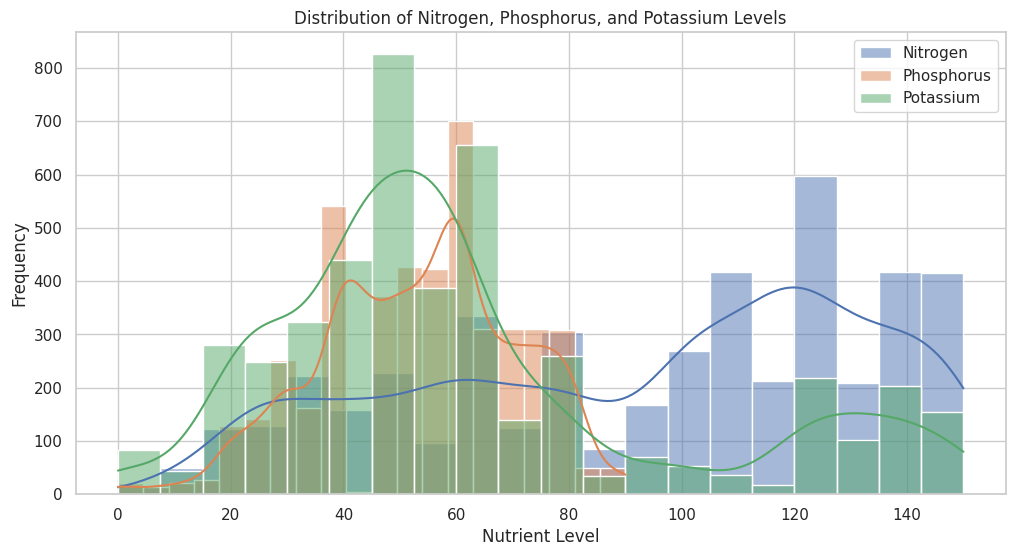

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Select key nutrients
nutrients = ['Nitrogen', 'Phosphorus', 'Potassium']

# Plot
plt.figure(figsize=(12, 6))
for nutrient in nutrients:
    sns.histplot(df[nutrient], label=nutrient, kde=True, bins=20)

plt.title("Distribution of Nitrogen, Phosphorus, and Potassium Levels")
plt.xlabel("Nutrient Level")
plt.ylabel("Frequency")
plt.legend()
plt.show()


<ipython-input-32-c83763cf561d>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Needs_Adjustment', data=df, palette=['green', 'red'])


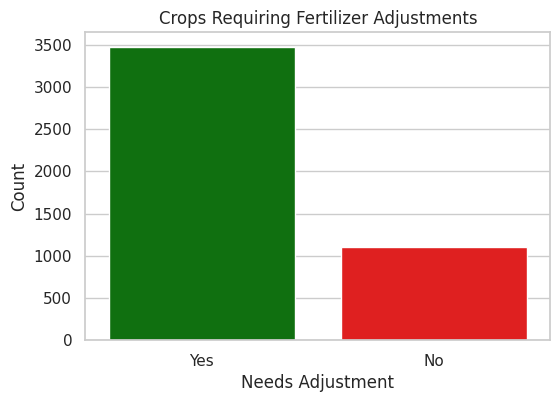

In [32]:
import numpy as np

# Count crops needing adjustments
df['Needs_Adjustment'] = np.where(df['Crop_Specific_Recommendations'].str.contains('low|high', case=False, na=False), 'Yes', 'No')

# Plot
plt.figure(figsize=(6,4))
sns.countplot(x='Needs_Adjustment', data=df, palette=['green', 'red'])
plt.title("Crops Requiring Fertilizer Adjustments")
plt.xlabel("Needs Adjustment")
plt.ylabel("Count")
plt.show()


In [33]:
import pandas as pd

# Step 1: Load the dataset
file_path = 'crop_recommendations.csv'  # Update if your file path differs
data = pd.read_csv(file_path)

# Step 2: Extract unique recommendations
unique_recommendations = data['Crop_Specific_Recommendations'].unique()
print(f"Unique Recommendations: {len(unique_recommendations)}")
print(unique_recommendations)

# Step 3: Create a mapping
recommendation_to_id = {recommendation: idx for idx, recommendation in enumerate(unique_recommendations)}
id_to_recommendation = {idx: recommendation for recommendation, idx in recommendation_to_id.items()}
print("Mapping of Recommendations to IDs:", recommendation_to_id)

# Step 4: Apply encoding
data['Recommendation_ID'] = data['Crop_Specific_Recommendations'].map(recommendation_to_id)

# Verify the dataset
print(data[['Crop', 'Crop_Specific_Recommendations', 'Recommendation_ID']].head())

# Save the updated dataset
encoded_file_path = 'encoded_crop_recommendations.csv'
data.to_csv(encoded_file_path, index=False)
print(f"Encoded dataset saved at {encoded_file_path}")


Unique Recommendations: 95
['Nitrogen is low for kidneybeans. Apply urea or composted manure.\nPhosphorus is low for kidneybeans. Use superphosphate or bone meal.\nPotassium is low for kidneybeans. Apply muriate of potash or banana peels.'
 'All nutrient levels are optimal for cotton. No action required.'
 'Potassium is high for cotton. Avoid potassium-based fertilizers.'
 'Nitrogen is high for cotton. Reduce nitrogen-based fertilizers.'
 'Nitrogen is high for cotton. Reduce nitrogen-based fertilizers.\nPotassium is high for cotton. Avoid potassium-based fertilizers.'
 'Nitrogen is low for orange. Apply urea or composted manure.\nPhosphorus is low for orange. Use superphosphate or bone meal.\nPotassium is low for orange. Apply muriate of potash or banana peels.'
 'Potassium is low for gram. Apply muriate of potash or banana peels.'
 'All nutrient levels are optimal for gram. No action required.'
 'All nutrient levels are optimal for wheat. No action required.'
 'Nitrogen is high for wh

In [34]:
# Display key outputs concisely
print(f"Total Unique Recommendations: {len(unique_recommendations)}")
print("\nSample of Recommendation to ID Mapping:")
for recommendation, rec_id in list(recommendation_to_id.items())[:5]:
    print(f"'{recommendation}': {rec_id}")

# Show a snippet of the updated dataset
print("\nDataset Sample with Encoded Recommendations:")
print(data[['Crop', 'Crop_Specific_Recommendations', 'Recommendation_ID']].head())


Total Unique Recommendations: 95

Sample of Recommendation to ID Mapping:
'Nitrogen is low for kidneybeans. Apply urea or composted manure.
Phosphorus is low for kidneybeans. Use superphosphate or bone meal.
Potassium is low for kidneybeans. Apply muriate of potash or banana peels.': 0
'All nutrient levels are optimal for cotton. No action required.': 1
'Potassium is high for cotton. Avoid potassium-based fertilizers.': 2
'Nitrogen is high for cotton. Reduce nitrogen-based fertilizers.': 3
'Nitrogen is high for cotton. Reduce nitrogen-based fertilizers.
Potassium is high for cotton. Avoid potassium-based fertilizers.': 4

Dataset Sample with Encoded Recommendations:
          Crop                      Crop_Specific_Recommendations  \
0  kidneybeans  Nitrogen is low for kidneybeans. Apply urea or...   
1       cotton  All nutrient levels are optimal for cotton. No...   
2       cotton  All nutrient levels are optimal for cotton. No...   
3       cotton  All nutrient levels are optimal f

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# Example dataset loading (replace with your actual dataset)
data = pd.read_csv("encoded_crop_recommendations.csv")

# Remove rare classes with only one instance
class_counts = data['Recommendation_ID'].value_counts()
valid_classes = class_counts[class_counts > 1].index
data_filtered = data[data['Recommendation_ID'].isin(valid_classes)]

# Redefine features and target
X = data_filtered[['Crop', 'Soil','Nitrogen', 'Phosphorus', 'Potassium']]
y = data_filtered['Recommendation_ID']

# One-hot encode the 'Crop' column
X = pd.get_dummies(X, columns=['Crop', 'Soil'], drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display shapes
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# Initialize models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

# Train and evaluate models
results = []
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall
    })
    print(f"\n{model_name} Classification Report:\n", classification_report(y_test, y_pred))

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Accuracy", data=results_df, palette="viridis")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.ylim(0, 1)
plt.show()

plt.figure(figsize=(10, 6))
results_df.set_index("Model")[["Precision", "Recall"]].plot(kind="bar", figsize=(10, 6), colormap="viridis")
plt.title("Precision and Recall Comparison")
plt.ylabel("Scores")
plt.xlabel("Model")
plt.ylim(0, 1)
plt.legend(loc="lower right")
plt.show()


X_train shape: (3656, 36)
X_test shape: (915, 36)
y_train shape: (3656,)
y_test shape: (915,)

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00        56
           4       1.00      1.00      1.00        12
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         8
           7       1.00      1.00      1.00         4
           8       1.00      1.00      1.00        80
           9       1.00      1.00      1.00        68
          10       1.00      1.00      1.00         6
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00        22
          13       1.00      1.00      1.00         6
          14       1.00      1.00      1.00        20
  

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89], got [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 83 84 85 87 88 89 90 92]

X_train shape: (3656, 36)
X_test shape: (915, 36)
y_train shape: (3656,)
y_test shape: (915,)

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00        56
           4       1.00      1.00      1.00        12
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         8
           7       1.00      1.00      1.00         4
           8       1.00      1.00      1.00        80
           9       1.00      1.00      1.00        68
          10       1.00      1.00      1.00         6
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00        22
          13       1.00      1.00      1.00         6
          14       1.00      1.00      1.00        20
  

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         1
           3       0.78      0.93      0.85        56
           4       0.50      0.42      0.45        12
           5       0.50      1.00      0.67         1
           6       0.62      1.00      0.76         8
           7       1.00      0.25      0.40         4
           8       0.95      0.94      0.94        80
           9       0.90      0.94      0.92        68
          10       0.50      0.17      0.25         6
          11       0.00      0.00      0.00         2
          12       0.68      0.86      0.76        22
          13       0.43      0.50      0.46         6
          14       0.80      0.80      0.80        20
          15       1.00      1.00      1.00         6
          16       0.89      0.89   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_


XGBoost Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00        56
           4       1.00      1.00      1.00        12
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         8
           7       1.00      1.00      1.00         4
           8       1.00      1.00      1.00        80
           9       1.00      1.00      1.00        68
          10       0.86      1.00      0.92         6
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00        22
          13       1.00      1.00      1.00         6
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00         6
          16       0.95      1.00      0.97     

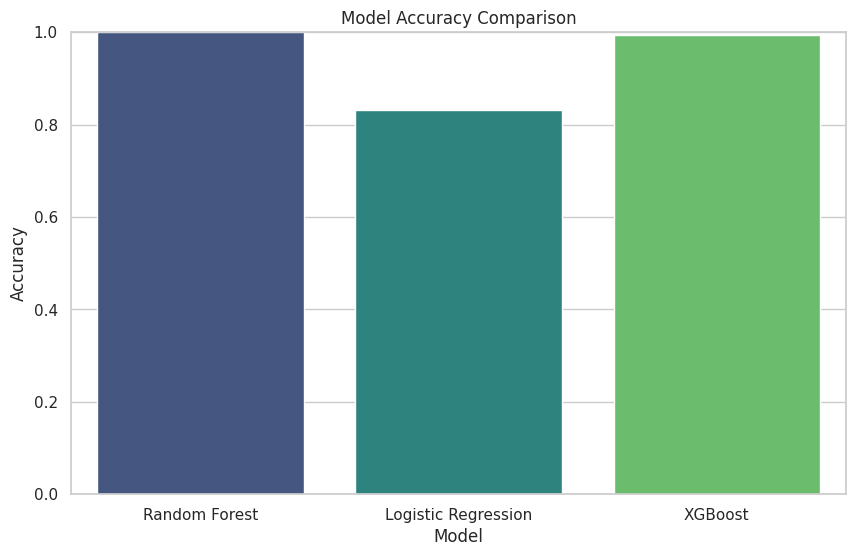

<Figure size 1000x600 with 0 Axes>

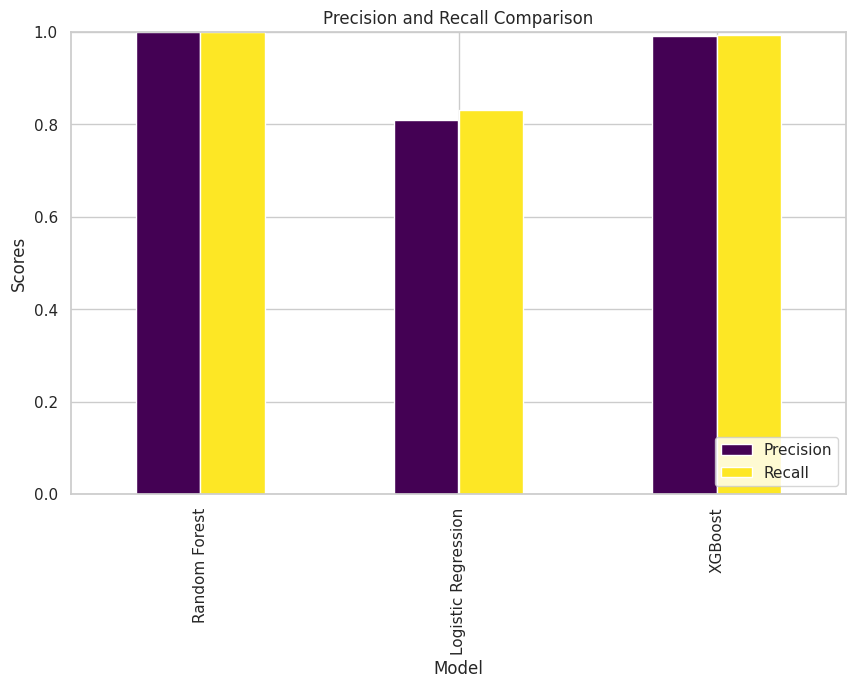

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Example dataset loading (replace with your actual dataset)
data = pd.read_csv("encoded_crop_recommendations.csv")

# Remove rare classes with only one instance
class_counts = data['Recommendation_ID'].value_counts()
valid_classes = class_counts[class_counts > 1].index
data_filtered = data[data['Recommendation_ID'].isin(valid_classes)]

# Redefine features and target
X = data_filtered[['Crop', 'Soil','Nitrogen', 'Phosphorus', 'Potassium']]
y = data_filtered['Recommendation_ID']

# One-hot encode the 'Crop' column
X = pd.get_dummies(X, columns=['Crop', 'Soil'], drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target variable
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)


# Display shapes
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# Initialize models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

# Train and evaluate models
results = []
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall
    })
    print(f"\n{model_name} Classification Report:\n", classification_report(y_test, y_pred))

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Accuracy", data=results_df, palette="viridis")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.ylim(0, 1)
plt.show()

plt.figure(figsize=(10, 6))
results_df.set_index("Model")[["Precision", "Recall"]].plot(kind="bar", figsize=(10, 6), colormap="viridis")
plt.title("Precision and Recall Comparison")
plt.ylabel("Scores")
plt.xlabel("Model")
plt.ylim(0, 1)
plt.legend(loc="lower right")
plt.show()

###Model


In [44]:
import numpy as np

def predict_and_display_recommendation(model, label_encoder, crop_encoder, soil_encoder):
    """
    Take user inputs, predict the recommendation, and display the result.

    Parameters:
        model (sklearn model): Trained machine learning model.
        label_encoder (LabelEncoder): LabelEncoder for decoding the recommendation.
        crop_encoder (OneHotEncoder or equivalent): Encoder for the 'Crop' column.
        soil_encoder (OneHotEncoder or equivalent): Encoder for the 'Soil' column.

    Returns:
        None
    """
    # Collect user inputs
    try:
        n = int(input("Enter Nitrogen level (N): "))
        p = int(input("Enter Phosphorus level (P): "))
        k = int(input("Enter Potassium level (K): "))
        soil_type = input("Enter Soil Type: ").strip()
        crop = input("Enter Crop Type: ").strip()

        # Prepare input data
        crop_one_hot = crop_encoder.transform([[crop]]).toarray()
        soil_one_hot = soil_encoder.transform([[soil_type]]).toarray()

        # Concatenate all features
        input_features = np.concatenate((crop_one_hot, soil_one_hot, [[n, p, k]]), axis=1)

        # Predict recommendation
        prediction_encoded = model.predict(input_features)[0]

        # Decode recommendation to text
        recommendation = label_encoder.inverse_transform([prediction_encoded])[0]

        # Display result
        print("\nRecommended Action:", recommendation)

    except Exception as e:
        print("An error occurred:", str(e))

# Example usage (replace with your actual trained model and encoders):
# model = ...  # Trained model
# label_encoder = ...  # LabelEncoder for recommendations
# crop_encoder = ...  # OneHotEncoder for crops
# soil_encoder = ...  # OneHotEncoder for soils

# predict_and_display_recommendation(model, label_encoder, crop_encoder, soil_encoder)
